# Generate Simulated Data: Fixed-Plaintext-Dataset-7

In [29]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [30]:
# Define lengh for the data set
data_leng = 1000000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4
fieldMasked2 = 44
fieldMasked3 = 20

#Random Plaintext
FixedPlaintext = True

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [31]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [32]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,1000000,50,23,0.0,5.0,None,None


In [33]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [34]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
mask2 = []
mask3 = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))
    mask2.append(random.randint(0,255))
    mask3.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5],'\nmask2',mask2[0:5],'\nmask3',mask2[0:5])

plaintext: [82, 82, 82, 82, 82] 
mask [12, 246, 243, 237, 45] 
mask2 [141, 237, 166, 8, 186] 
mask3 [141, 237, 166, 8, 186]


In [35]:
# Verify size of plaintext
len(plaintext)

1000000

In [36]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [5.340976143568468, 3.666577692725487, 1.0231538398796514, 0.030569454067590485, 6.092024992171061] 
labels: [5, 5, 5, 5, 5]


In [37]:
# Verify size of leakedData 
len(leakedData)

1000000

In [38]:
# Verify size of labels 
len(labels)

1000000

In [39]:
maskedData = []
maskedNoise = []
maskedNoise2 = []
maskedNoise3 = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex]^mask2[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise2.append((bin(mask2[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise3.append((bin(mask3[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5],"\nmaskedNoise2:",maskedNoise2[0:5],"\nmaskedNoise2:",maskedNoise3[0:5])

maskedData: [-2.500117707267597, 5.637123203230049, -1.7910715805066015, 3.616400222534913, -0.5974718283552916] 
maskedNoise: [2.899675317055313, 5.455219274551823, 5.5668992973429114, 4.5211552707298885, 4.403026437948034] 
maskedNoise2: [5.349333389480174, 9.0272589452462, 9.4188229166953, -0.8887479809744236, 4.645045119706675] 
maskedNoise2: [10.52474354020908, -7.007629697184868, 4.60598120849359, 11.331148931891008, 3.708216567760938]


In [40]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        elif z == fieldMasked3:
            rawData.append(maskedNoise3[i])
            
        elif z == fieldMasked2:
            rawData.append(maskedNoise2[i])     
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [-5.1152738838285305, 1.8073394415816133, 14.54713661058859, 3.739395634125108, 2.899675317055313, 7.5016335309988085, -1.0789906831685494, 4.924121906806999, 5.850352681109905, -6.797034861885326, 1.309981111712494, 5.02383246963794, 0.4723856885300197, -2.834452078162462, 6.264347004983874, 5.529448690840397, 5.877039129456213, 3.193096392924228, -7.201996336851339, 4.183470989282366, 10.52474354020908, 2.540186938913803, 4.901493928824567, 8.650603164764817, -2.500117707267597, 2.77842417981581, -8.653191701577697, -1.0371814892824291, 7.906075185227725, -0.847958794969089, 6.79393801863113, -2.9456994172717845, 4.868245530645694, 1.7689189600764013, 3.9704748556647154, 2.6302339697973927, 4.243463114161468, -2.7599428230506184, 12.806362349238778, 13.893225588095488, 9.208374011630664, 4.999633683680316, 13.889523146884969, 6.950641038994606, 5.349333389480174, 10.66218786940714, 4.999110939590312, 2.097748128087403, 5.328150330407083, 3.8961631770494476]
S

In [41]:
# Verify size of leakedData 
len(rawTraces)

1000000

## Plot Simulated Data

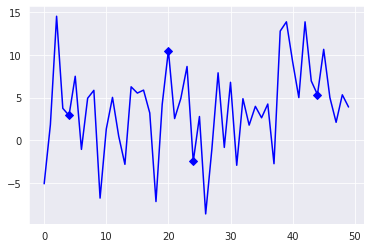

In [42]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2,fieldMasked3])

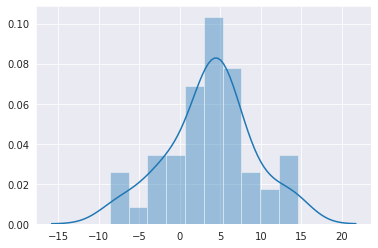

In [43]:
sns.distplot(rawTraces[0])

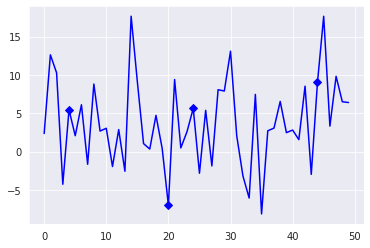

In [44]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2,fieldMasked3])

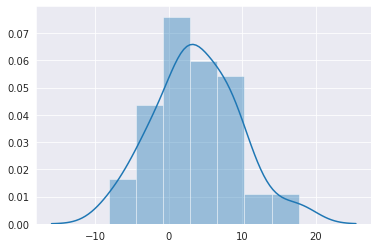

In [45]:
sns.distplot(rawTraces[1])

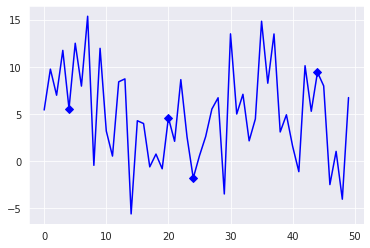

In [46]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2,fieldMasked3])

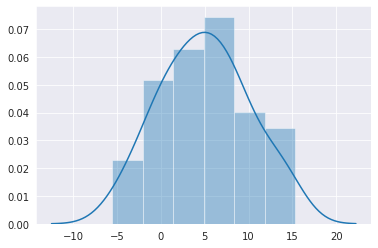

In [47]:
sns.distplot(rawTraces[2])

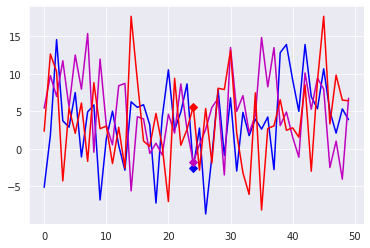

In [48]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[24])

### Data Path

In [49]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [50]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, True) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'FixedPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.005s

OK


In [51]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,-5.115274,1.807339,14.547137,3.739396,2.899675,7.501634,-1.078991,4.924122,5.850353,-6.797035,...,4.999634,13.889523,6.950641,5.349333,10.662188,4.999111,2.097748,5.328150,3.896163,82
1,2.353859,12.624140,10.278725,-4.260775,5.455219,2.072582,6.107022,-1.656425,8.807762,2.680500,...,1.560778,8.531818,-2.970926,9.027259,17.651280,3.325257,9.819342,6.501455,6.400066,82
2,5.421691,9.748053,6.986567,11.736542,5.566899,12.492206,7.953360,15.351863,-0.439437,11.951879,...,-1.110211,10.111900,5.285843,9.418823,7.973076,-2.479377,1.038597,-4.026482,6.734958,82
3,4.452691,13.179348,4.938730,-0.535004,4.521155,-3.221302,-3.159749,3.004303,5.654633,12.820546,...,16.266517,-2.012157,0.439165,-0.888748,2.431204,1.664479,6.083273,2.747003,5.132696,82
4,1.721692,-1.232986,5.696225,7.232777,4.403026,6.882847,3.677643,-0.316227,8.975417,4.233381,...,-2.366697,-0.439326,9.103528,4.645045,14.747316,1.235810,8.793178,-1.004277,12.342950,82


### Write Data

In [52]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS7_B.csv',index=False)